In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
data = pd.read_csv('sample_sales_data.csv')

In [10]:
data.sample(5)

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
3538,3538,4bba1f0e-8411-4bc8-9627-17861a970ea4,2022-03-01 11:35:06,ec4aa84b-bcb9-4b6a-b5ef-1ab2462e15a0,packaged foods,standard,2.99,3,8.97,cash
3821,3821,e0c55275-ff22-4adb-8394-6e9ccae7354b,2022-03-04 15:08:01,45e616c3-8582-447b-a897-956565375a3b,beverages,standard,14.49,3,43.47,cash
5913,5913,ef17dec1-2bd7-4b47-a853-5769235c7847,2022-03-02 15:25:36,0f0341de-4b99-43bf-b4bb-f60af2131d68,baking,basic,2.99,4,11.96,debit card
1560,1560,601be917-a0ee-4931-a4e5-d560e3a60415,2022-03-01 10:11:46,4c529bbb-2443-43c7-806d-6e09c86ea578,vegetables,standard,4.49,1,4.49,e-wallet
1524,1524,1275b61e-d776-4a27-96a3-cffa09a20413,2022-03-06 15:59:13,abc7ecb4-9cbf-4276-8d2d-7bdac2ae5e9f,vegetables,gold,4.99,4,19.96,e-wallet


In [23]:
data.shape

(7829, 10)

In [14]:
data.dtypes

Unnamed: 0          int64
transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [22]:
data['category'].value_counts()

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [24]:
data['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [35]:
data['customer_type'].value_counts()/len(data['customer_type'].value_counts())

non-member    320.2
standard      319.0
premium       318.0
basic         305.2
gold          303.4
Name: customer_type, dtype: float64

In [30]:
data['category'].value_counts()/len(data['category'].value_counts())

fruit                    45.363636
vegetables               38.454545
packaged foods           23.045455
baked goods              20.136364
canned foods             19.590909
refrigerated items       19.318182
kitchen                  17.363636
meat                     17.363636
dairy                    17.045455
beverages                13.681818
cheese                   13.318182
cleaning products        13.272727
baking                   12.000000
snacks                   11.954545
frozen                   11.954545
seafood                  11.500000
medicine                 11.045455
baby products            10.181818
condiments and sauces     8.227273
personal care             8.045455
pets                      7.318182
spices and herbs          5.681818
Name: category, dtype: float64

In [36]:
data['quantity'].value_counts()

1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64

In [37]:
data['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

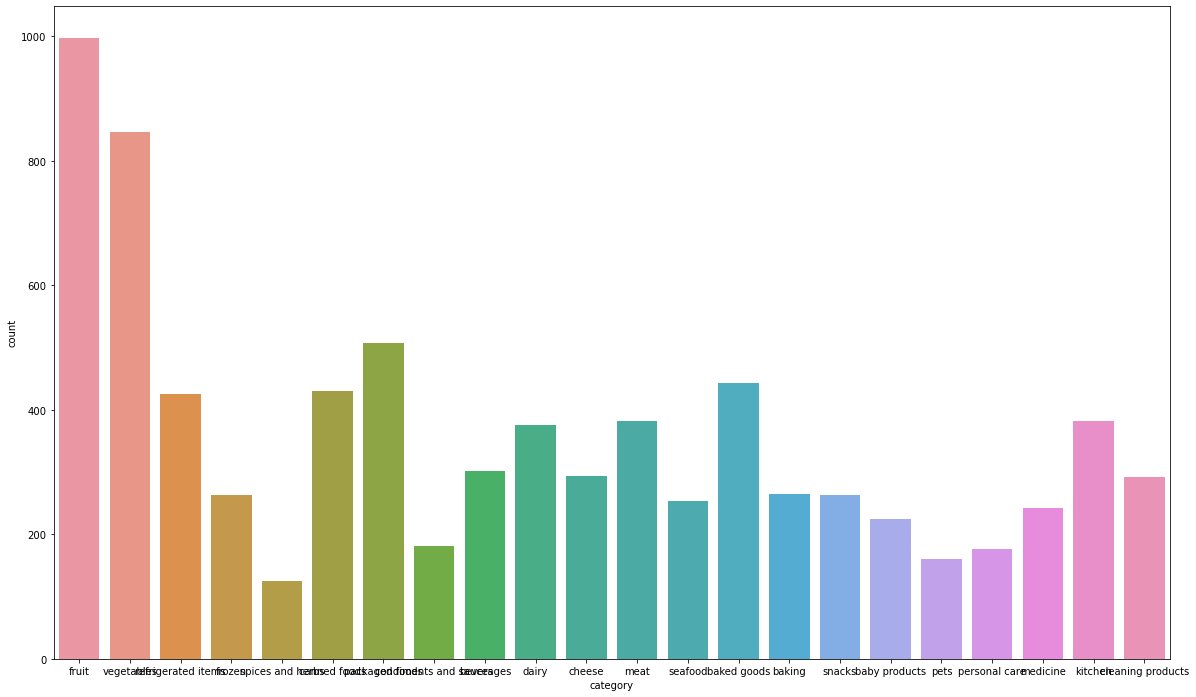

In [39]:
plt.rcParams['figure.figsize'] = [20, 12]
sns.countplot(data['category'])

<AxesSubplot:xlabel='customer_type', ylabel='count'>

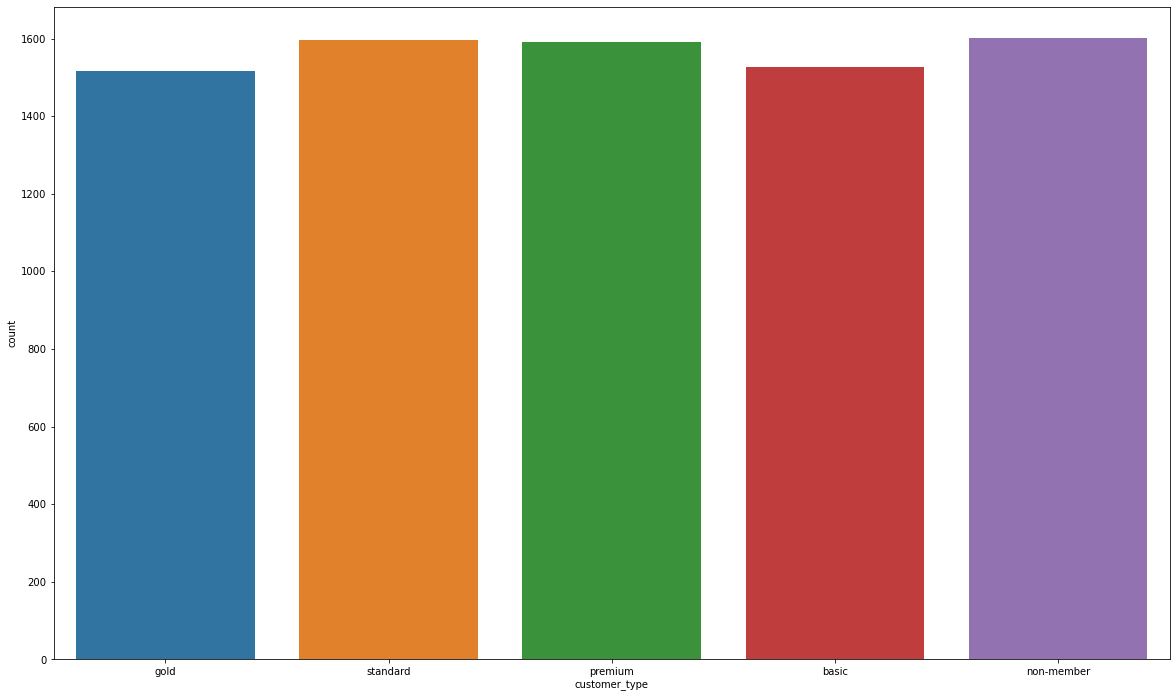

In [40]:
plt.rcParams['figure.figsize'] = [20, 12]
sns.countplot(data['customer_type'])

<AxesSubplot:xlabel='payment_type', ylabel='count'>

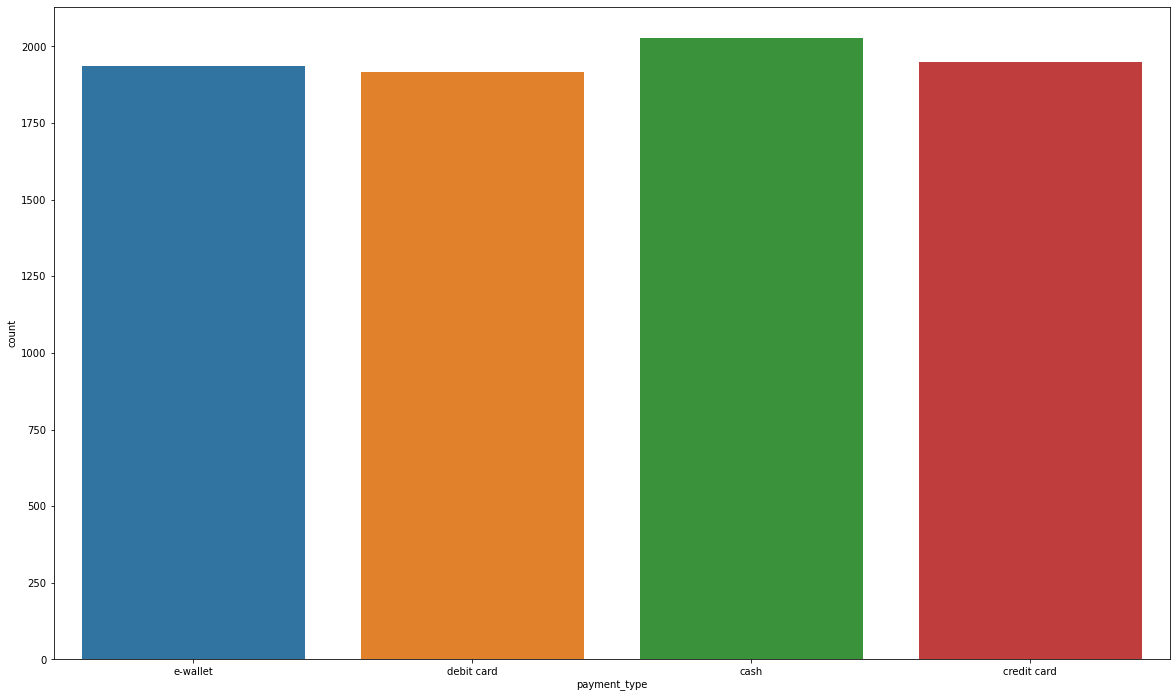

In [41]:
plt.rcParams['figure.figsize'] = [20, 12]
sns.countplot(data['payment_type'])

In [52]:
data[data['category']=='vegetables'][['customer_type']].value_counts()

customer_type
premium          182
non-member       177
gold             174
basic            160
standard         153
dtype: int64

In [53]:
data[data['category']=='fruit'][['customer_type']].value_counts()

customer_type
standard         222
premium          206
gold             197
non-member       187
basic            186
dtype: int64

<AxesSubplot:ylabel='customer_type'>

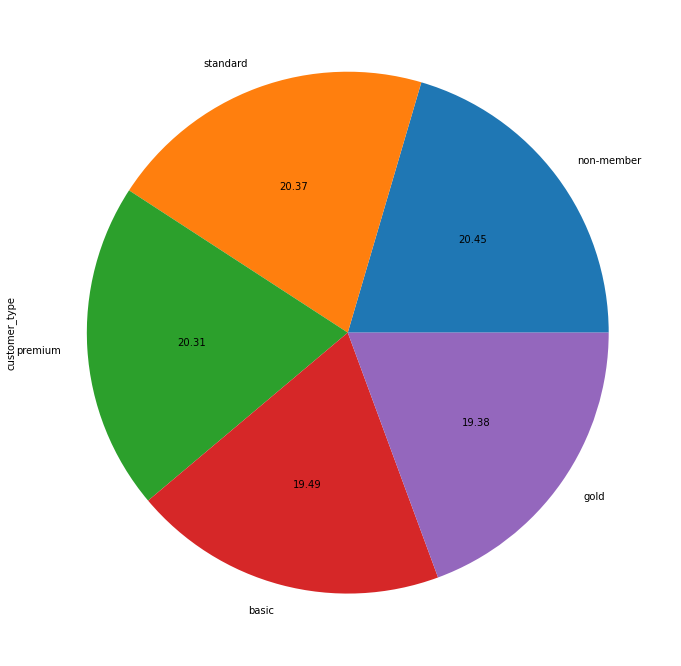

In [54]:
data['customer_type'].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='payment_type'>

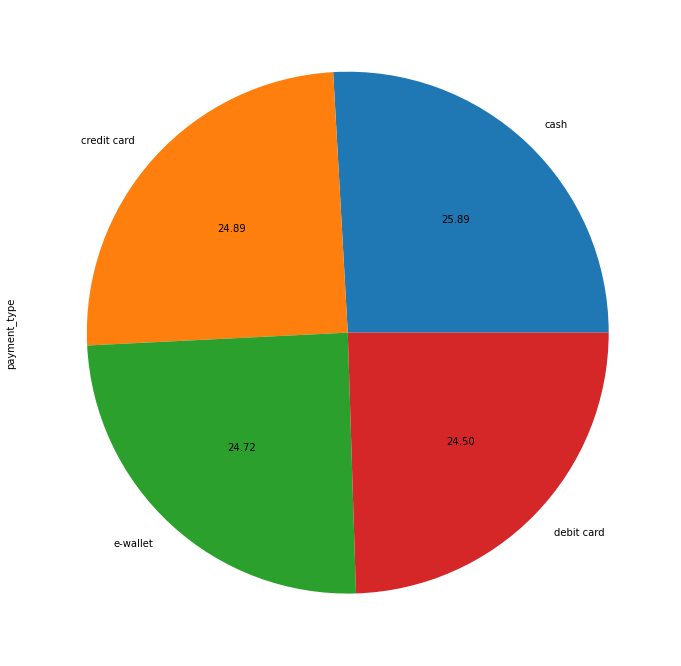

In [55]:
data['payment_type'].value_counts().plot(kind='pie',autopct='%.2f')

In [56]:
data[data['category']=='fruit'][['quantity']].value_counts()

quantity
1           271
2           251
3           238
4           238
dtype: int64

In [58]:
data[data['category']=='vegetables'][['quantity']].value_counts()

quantity
3           223
1           211
4           210
2           202
dtype: int64

In [65]:
data['total'].value_counts()

14.97    104
3.99     103
11.97     98
4.99      94
19.96     94
        ... 
60.57      2
47.98      2
17.99      2
20.19      1
35.98      1
Name: total, Length: 256, dtype: int64

In [89]:
top_least_selling = data.copy()

In [90]:
top_least_selling.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [91]:
top_least_selling.drop(columns=['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'], inplace=True)

In [99]:
top_least_selling.value_counts()

category             
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
meat                     382
kitchen                  382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
frozen                   263
snacks                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
dtype: int64

In [ ]:
sns.lineplot(data['timestamp'],data['total'])

<AxesSubplot:xlabel='timestamp', ylabel='total'>

<AxesSubplot:xlabel='payment_type', ylabel='total'>

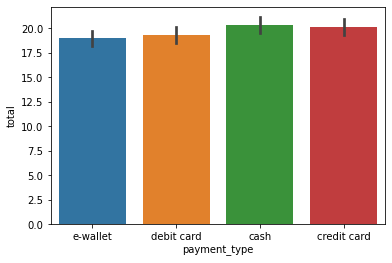

In [4]:
sns.barplot(data['payment_type'], data['total'])

<AxesSubplot:xlabel='customer_type', ylabel='total'>

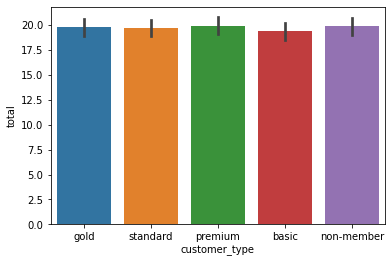

In [13]:
sns.barplot(data['customer_type'], data['total'])

In [12]:
data.describe()

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


<AxesSubplot:ylabel='None'>

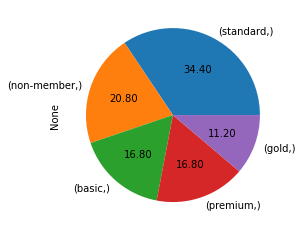

In [36]:
data[data['category']=='spices and herbs'][['customer_type']].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='None'>

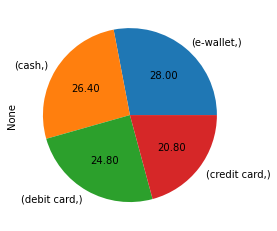

In [37]:
data[data['category']=='spices and herbs'][['payment_type']].value_counts().plot(kind='pie',autopct='%.2f')

<AxesSubplot:ylabel='None'>

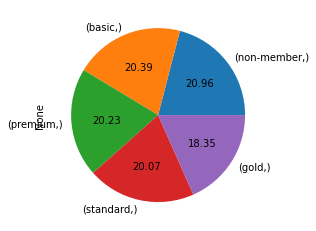

In [42]:
data[data['payment_type']=='debit card'][['customer_type']].value_counts().plot(kind='pie',autopct='%.2f')

In [38]:
data['payment_type'].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

In [45]:
data[data['category']=='personal care'][['unit_price']].value_counts()

unit_price
3.49          19
5.49          19
14.49         19
6.99          17
5.19          15
10.99         14
8.49          13
9.99          12
16.99         12
12.19         11
16.19         11
4.49           9
7.49           6
dtype: int64